# Relative feature tightness using part 9 for test data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [3]:
profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp0_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp1_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp2_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp3_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp4_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp5_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp6_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp7_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp8_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)

In [4]:
profile0.add_another_cooccurrence_profile(profile1)
profile0.add_another_cooccurrence_profile(profile2)
profile0.add_another_cooccurrence_profile(profile3)
profile0.add_another_cooccurrence_profile(profile4)
profile0.add_another_cooccurrence_profile(profile5)
profile0.add_another_cooccurrence_profile(profile6)
profile0.add_another_cooccurrence_profile(profile7)
profile0.add_another_cooccurrence_profile(profile8)

In [5]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile0)

In [6]:
pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(probability_profile)

In [7]:
reference_profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp0_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp1_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp2_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp3_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp4_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp5_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp6_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp7_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp8_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [8]:
reference_profile0.add_another_cooccurrence_profile(reference_profile1)
reference_profile0.add_another_cooccurrence_profile(reference_profile2)
reference_profile0.add_another_cooccurrence_profile(reference_profile3)
reference_profile0.add_another_cooccurrence_profile(reference_profile4)
reference_profile0.add_another_cooccurrence_profile(reference_profile5)
reference_profile0.add_another_cooccurrence_profile(reference_profile6)
reference_profile0.add_another_cooccurrence_profile(reference_profile7)
reference_profile0.add_another_cooccurrence_profile(reference_profile8)

In [9]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile0)

In [10]:
reference_pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(reference_probability_profile)

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [11]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1 feature2          
0        0         2.035007
         1         2.851579
         10        4.527120
         100       5.527124
         1000      3.330083
...                     ...
948      963      -3.197398
958      982      -1.027473
959      995      -0.027473
968      990      -3.612436
969      995      -0.027473

[2098016 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [12]:
coconut_samples = pd.read_csv('../data/CP1/COCONUT/COCOrandom.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'

In [13]:
df_split_coco = np.array_split(coconut_samples, 10)

In [14]:
df_split_coco[9]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
347668,C=C(C(=O)OC)C1CCC2(C)C(OC3OC(CO)C(O)C(O)C3O)CC...,460.230847,-1.30520,UIUPSHYSTLJURC-UHFFFAOYSA-N,UIUPSHYSTLJURC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 209, 222, 224, 249, 485, 489, 610, 619, 6..."
347669,COC(=O)C(O)Cc1ccccc1,180.078644,0.76300,NMPPJJIBQQCOOI-UHFFFAOYSA-N,NMPPJJIBQQCOOI,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 54, 79, 80, 147, 227, 389, 637, 650, 695, ..."
347670,CS(=O)(=O)N1CCN2C(=O)c3cc(-c4ccco4)ccc3NC(=O)C2C1,375.088892,0.98470,ZEMLBLQINDSYAF-UHFFFAOYSA-N,ZEMLBLQINDSYAF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[7, 74, 121, 142, 250, 268, 314, 350, 352, 474..."
347671,CC1CCC2(C)C(C(=O)O)CCCC2C1(C)CCc1ccoc1,318.219495,5.15560,NTRSOYPAPOGZQP-UHFFFAOYSA-N,NTRSOYPAPOGZQP,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[5, 80, 120, 149, 158, 384, 389, 396, 407, 478..."
347672,COc1ccc(C2=C(C=NCCc3c[nH]c4ccccc34)C(c3ccccc3C...,528.241293,7.74262,CCUNELBHYTXERR-UHFFFAOYSA-N,CCUNELBHYTXERR,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[14, 80, 94, 119, 140, 144, 249, 328, 335, 364..."
...,...,...,...,...,...,...,...,...
386292,COC(=O)C1=COC(OC2OC(COC(=O)c3ccc(O)c(OC)c3)C(O...,554.163556,-0.63720,LIVSNGMPJUCRLO-UHFFFAOYSA-N,LIVSNGMPJUCRLO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[58, 80, 145, 147, 167, 231, 233, 249, 314, 42..."
386293,Cc1c(CCC(=O)NCC(=O)NCC(=O)[O-])c(=O)oc2cc(O)c(...,395.065152,-0.62468,SSZVGMXOKPZNCV-UHFFFAOYSA-M,SSZVGMXOKPZNCV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 197, 252, 254, 305, 314, 366, 406, 42..."
386294,CC(=O)Oc1c(C)cc2c(c1O)C(=O)C(C1=CC(=O)c3cc(C)c...,490.089997,2.87624,JODPOMYHTFZNTK-UHFFFAOYSA-N,JODPOMYHTFZNTK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[16, 39, 84, 202, 224, 314, 333, 352, 516, 641..."
386295,C[N+]([O-])=NCOC1OC(CO)C(O)C(OC2OC(COC3OC(CO)C...,576.201398,-6.99890,STHHNNUYQQUJGY-UHFFFAOYSA-N,STHHNNUYQQUJGY,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 80, 170, 222, 349, 443, 489, 588, 610, 65..."


In [15]:
zinc_samples = pd.read_csv('../data/CP1/ZINC/ZINCrandom.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)

In [16]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[9]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
341111,Cc1ccccc1-c1cccc(CC2(C(=O)NC(C)C)CCN(C(=O)C3CC...,446.293328,5.52812,SUYHNOGEZNHGOI-UHFFFAOYSA-N,SUYHNOGEZNHGOI,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 53, 80, 117, 184, 188, 217, 246, 283, 310,..."
341112,CCCOC(=O)c1ccc(Nc2cc(Cl)ccc2C)c(N)c1,318.113506,4.54102,NQDHFRARHMZOPA-UHFFFAOYSA-N,NQDHFRARHMZOPA,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 80, 99, 145, 147, 165, 167, 216, 294, 450..."
341113,CCOCCOCCN1CNc2nc(N)[nH]c(=O)c2C1,283.164440,-0.40980,IFWMXZKGZHNCLA-UHFFFAOYSA-N,IFWMXZKGZHNCLA,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 80, 156, 204, 294, 314, 326, 334, 361, 37..."
341114,COC(=O)C(CN)CN,132.089878,-1.30700,FECXFRRSZGZESE-UHFFFAOYSA-N,FECXFRRSZGZESE,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 54, 80, 147, 265, 302, 650, 695, 807, 841,..."
341115,CNC(=O)[C@H](Cc1cnc[nH]1)NC(=O)c1ncc(C#N)cc1Cl,332.078851,0.41688,FRXHTCPSJYTRAP-NSHDSACASA-N,FRXHTCPSJYTRAP,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 11, 79, 80, 94, 102, 117, 188, 191, 305, 3..."
...,...,...,...,...,...,...,...,...
379007,CCOC(=O)C1=C(C)N=c2s/c(=C\c3ccc(OCC)c(OC)c3)c(...,478.156243,3.20560,NKVUPLXRBGDCKZ-FQWPPLDYSA-N,NKVUPLXRBGDCKZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[25, 80, 94, 125, 145, 147, 162, 237, 249, 281..."
379008,CCCCOc1ccc(-c2nn(-c3ccccc3)cc2CNC(=O)c2ccc(OCC...,501.242770,6.57610,GRVSBYRYFLOHAZ-UHFFFAOYSA-N,GRVSBYRYFLOHAZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 76, 80, 94, 102, 197, 255, 265, 294, 322,..."
379009,CNc1cc([C@H]2CCCN(Cc3cccc(C)c3)C2)nc(-c2cccnc2)n1,373.226646,4.26832,WGJHTUZEMVLXOF-FQEVSTJZSA-N,WGJHTUZEMVLXOF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 105, 257, 378, 437, 446, 736, 739, 744, 7..."
379010,COc1ccc(C23CC4CC(CC(C4)C2)C3)cc1C(=O)NC(c1cccc...,451.251129,6.68240,GUGKIBFTNCSUKM-UHFFFAOYSA-N,GUGKIBFTNCSUKM,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 46, 94, 117, 235, 249, 389, 484, 486, 556,..."


In [17]:
joint_samples = pd.concat((df_split_coco[9], df_split_zinc[9]), ignore_index=True)

In [18]:
for x in joint_samples.index:
    a = joint_samples['Bitset'][x]
    a = a.split(", ")
    a = re.sub('\[', '', str(a))
    a = re.sub('\]', '', str(a))
    tup = literal_eval(a)
    joint_samples['Bitset'][x] = tup

/var/tmp/pbs.43231.lich-compute.vscht.cz/ipykernel_36691/3101749155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Bitset'][x] = tup


## Relative feature tightness against a PMI interrelation profile

In [19]:
joint_samples['RFT'] = joint_samples['Bitset'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))

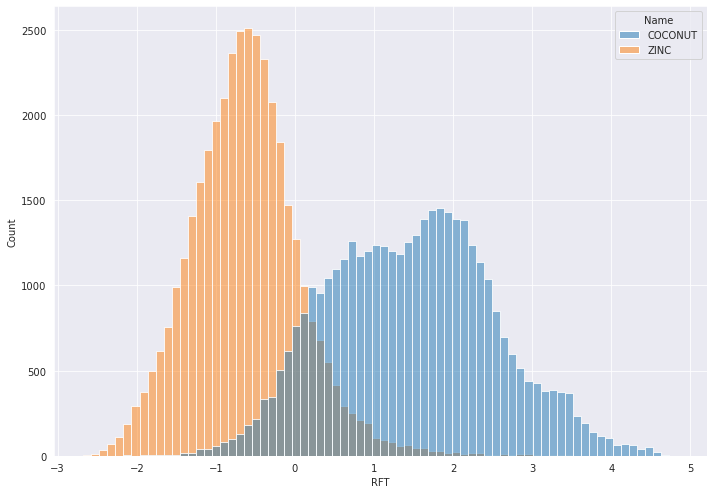

In [20]:
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.savefig(f"../images//joint_samples_RFT9.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.